In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"trillo1","key":"23cbde61f74a4bfaa484747ef5ecdf93"}'}

In [ ]:
!pip install -q kaggle

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets list

ref                                                           title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
------------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
syedanwarafridi/vehicle-sales-data                            Vehicle Sales Data                                  19MB  2024-02-21 20:16:17          14354        259  1.0              
sudarshan24byte/online-food-dataset                           Online Food Dataset                                  3KB  2024-03-02 18:50:30           4146         67  0.9411765        
arnavvvvv/spotify-music                                       Top Spotify Songs                                   47KB  2024-03-06 05:20:29           3959         57  1.0              
tarunrm09/climate-change-indicators                           Climate chang

In [ ]:
!kaggle datasets download -d ashishkumarjayswal/titanic-datasets

  0% 0.00/11.2k [00:00<?, ?B/s]
100% 11.2k/11.2k [00:00<00:00, 27.2MB/s]


In [ ]:
!unzip titanic-datasets.zip

Archive:  titanic-datasets.zip
  inflating: titanic.csv             


In [45]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##
sns.set_palette("husl", 8)
sns.set_style('darkgrid')

##
df =  pd.read_csv('titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


<Axes: xlabel='Survived', ylabel='count'>

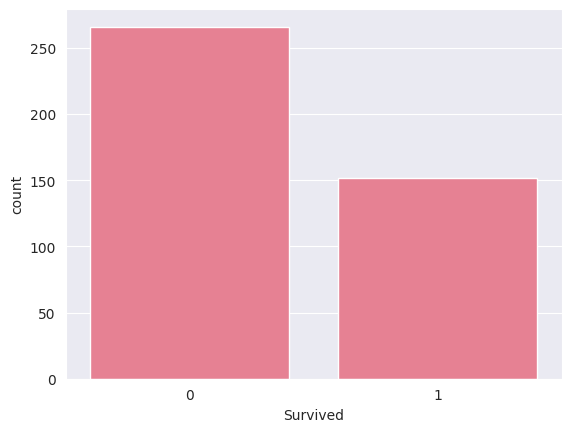

In [ ]:
sns.countplot(x = 'Survived',data=df)

<Axes: xlabel='Survived', ylabel='count'>

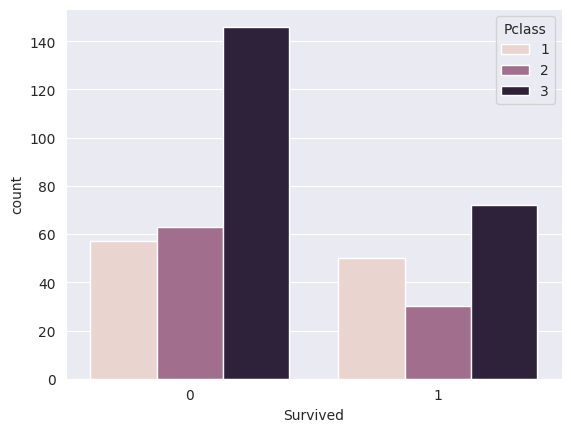

In [ ]:
sns.countplot(x = 'Survived',hue = 'Pclass',data=df)

<Axes: xlabel='Pclass', ylabel='count'>

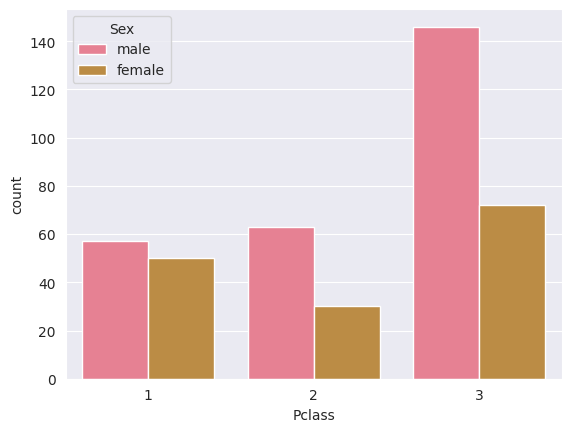

In [ ]:
sns.countplot(x='Pclass',hue='Sex',data=df)

<Axes: xlabel='Age', ylabel='Count'>

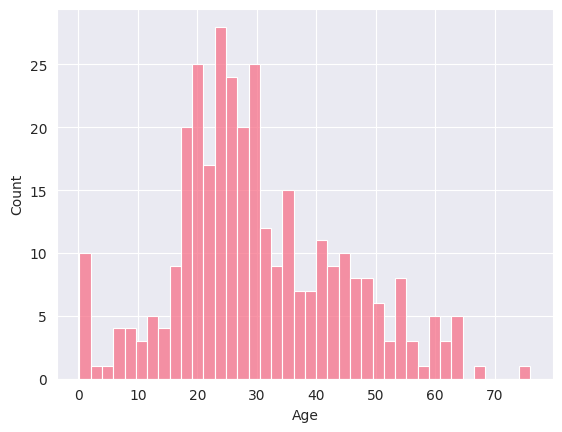

In [ ]:
sns.histplot(df['Age'],bins=40)

<Axes: xlabel='Fare', ylabel='Count'>

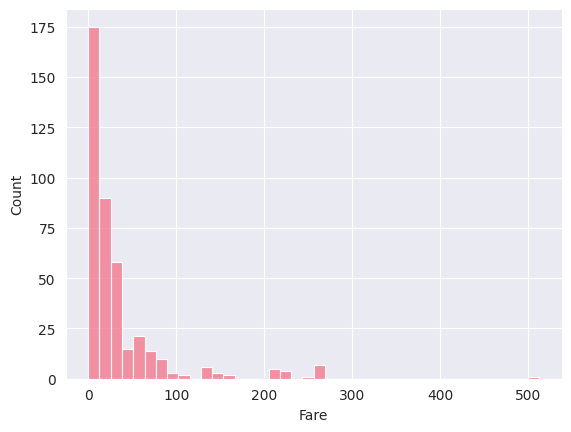

In [ ]:
sns.histplot(df['Fare'],bins=40)

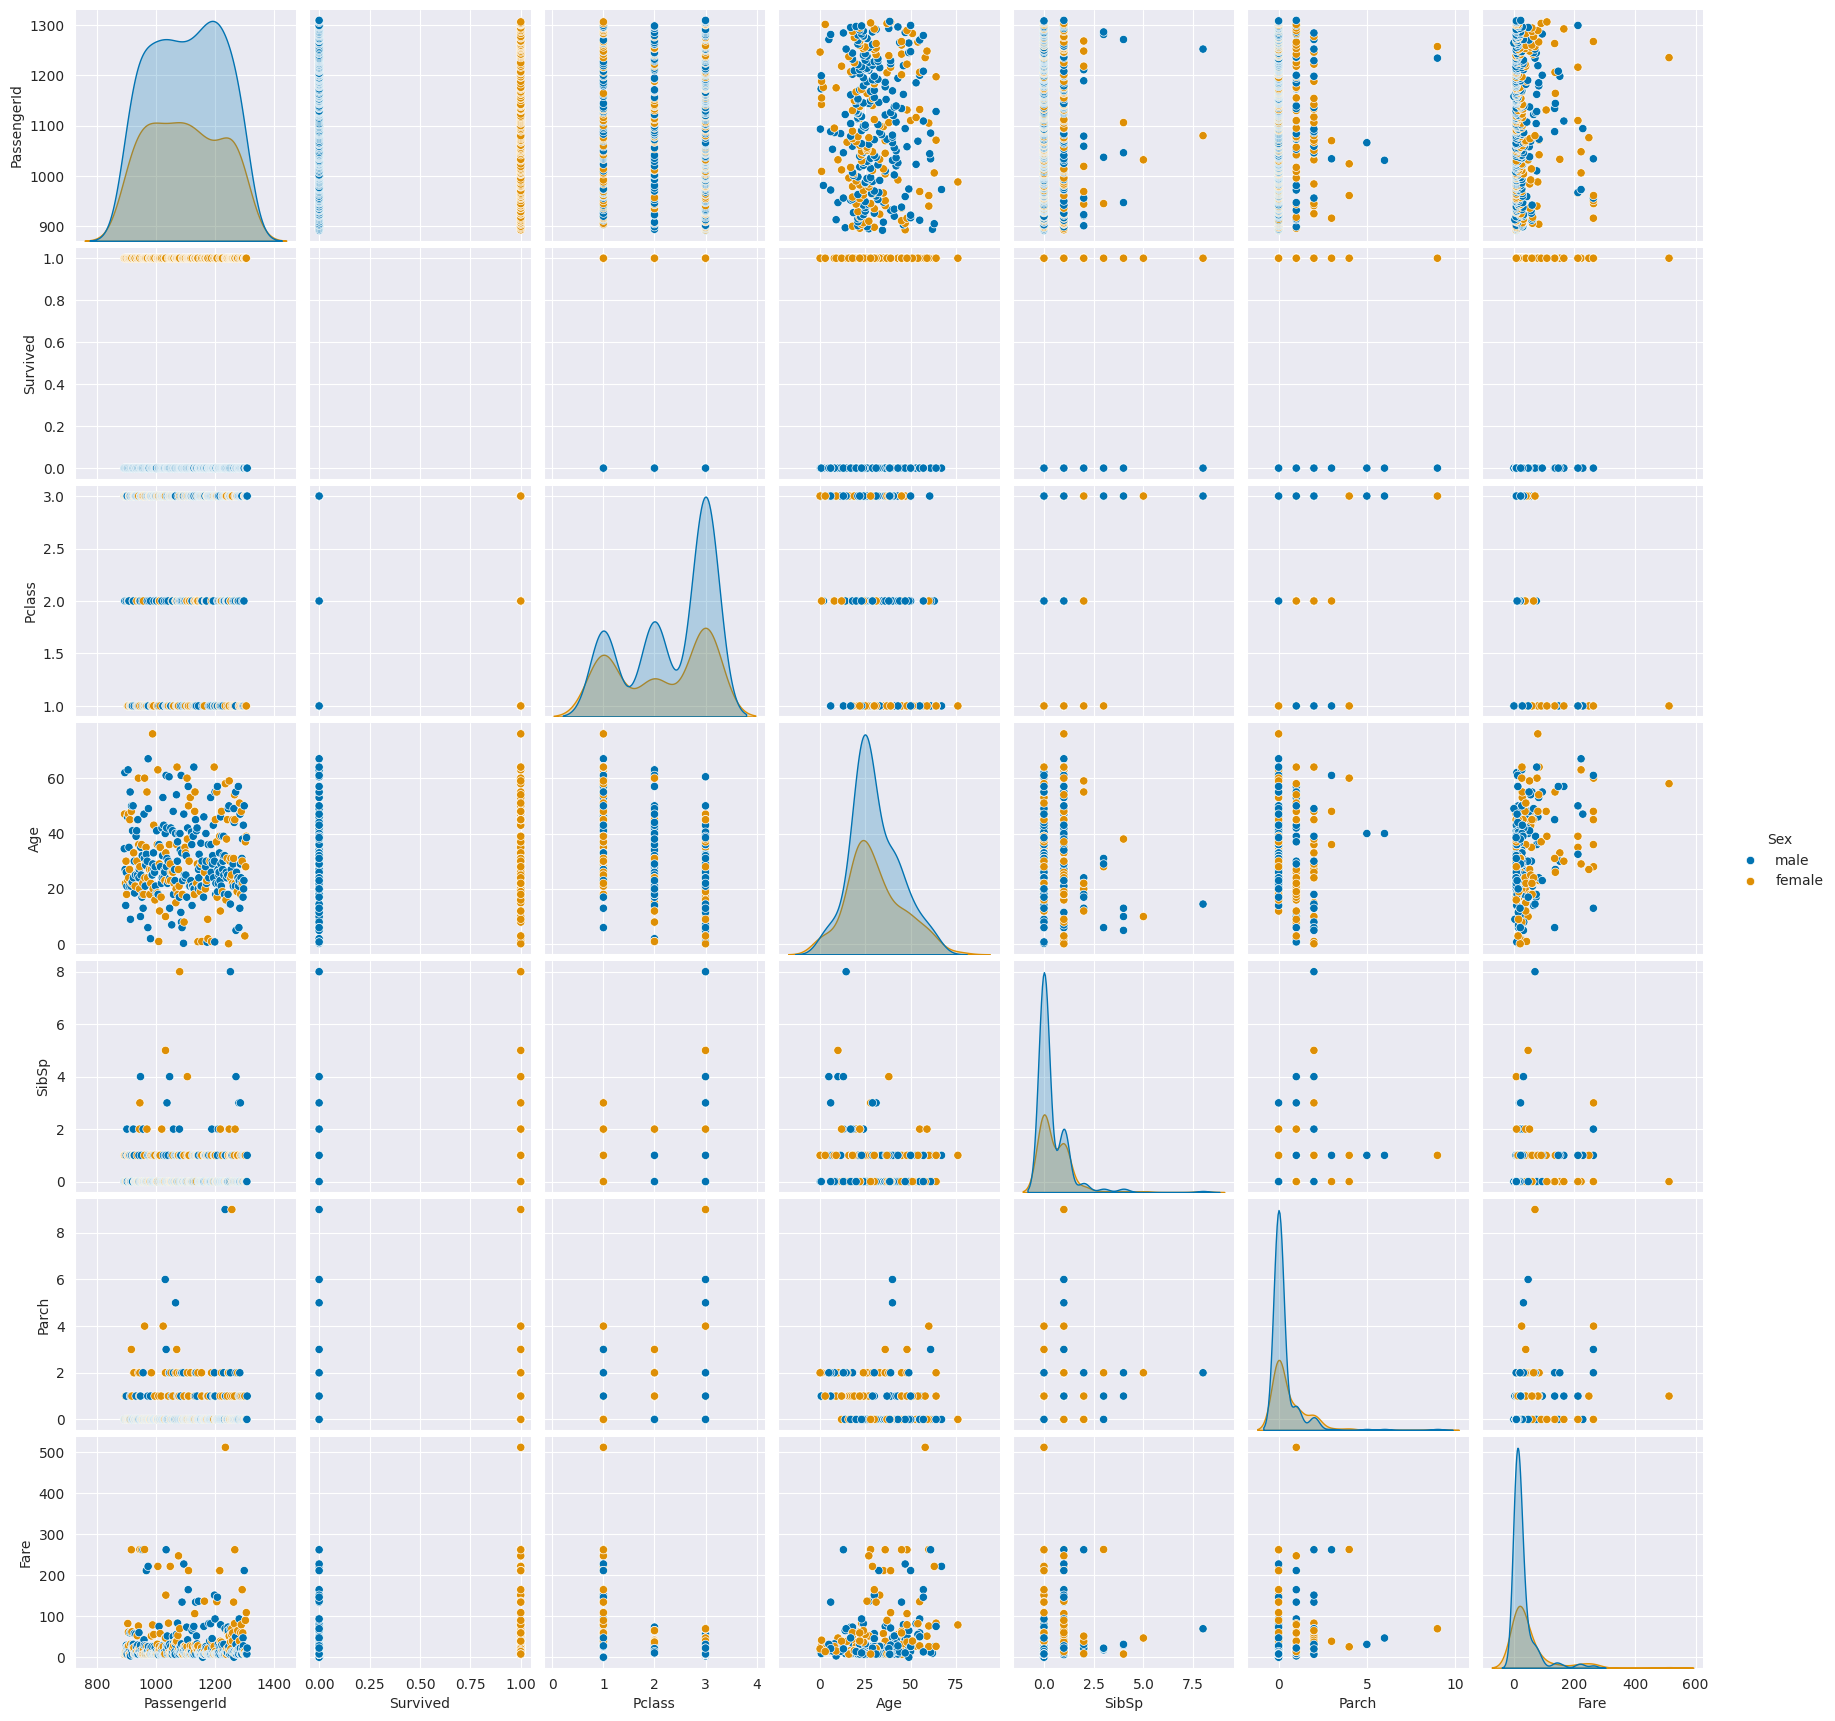

In [ ]:
sns.pairplot(df,hue='Sex',palette='colorblind')

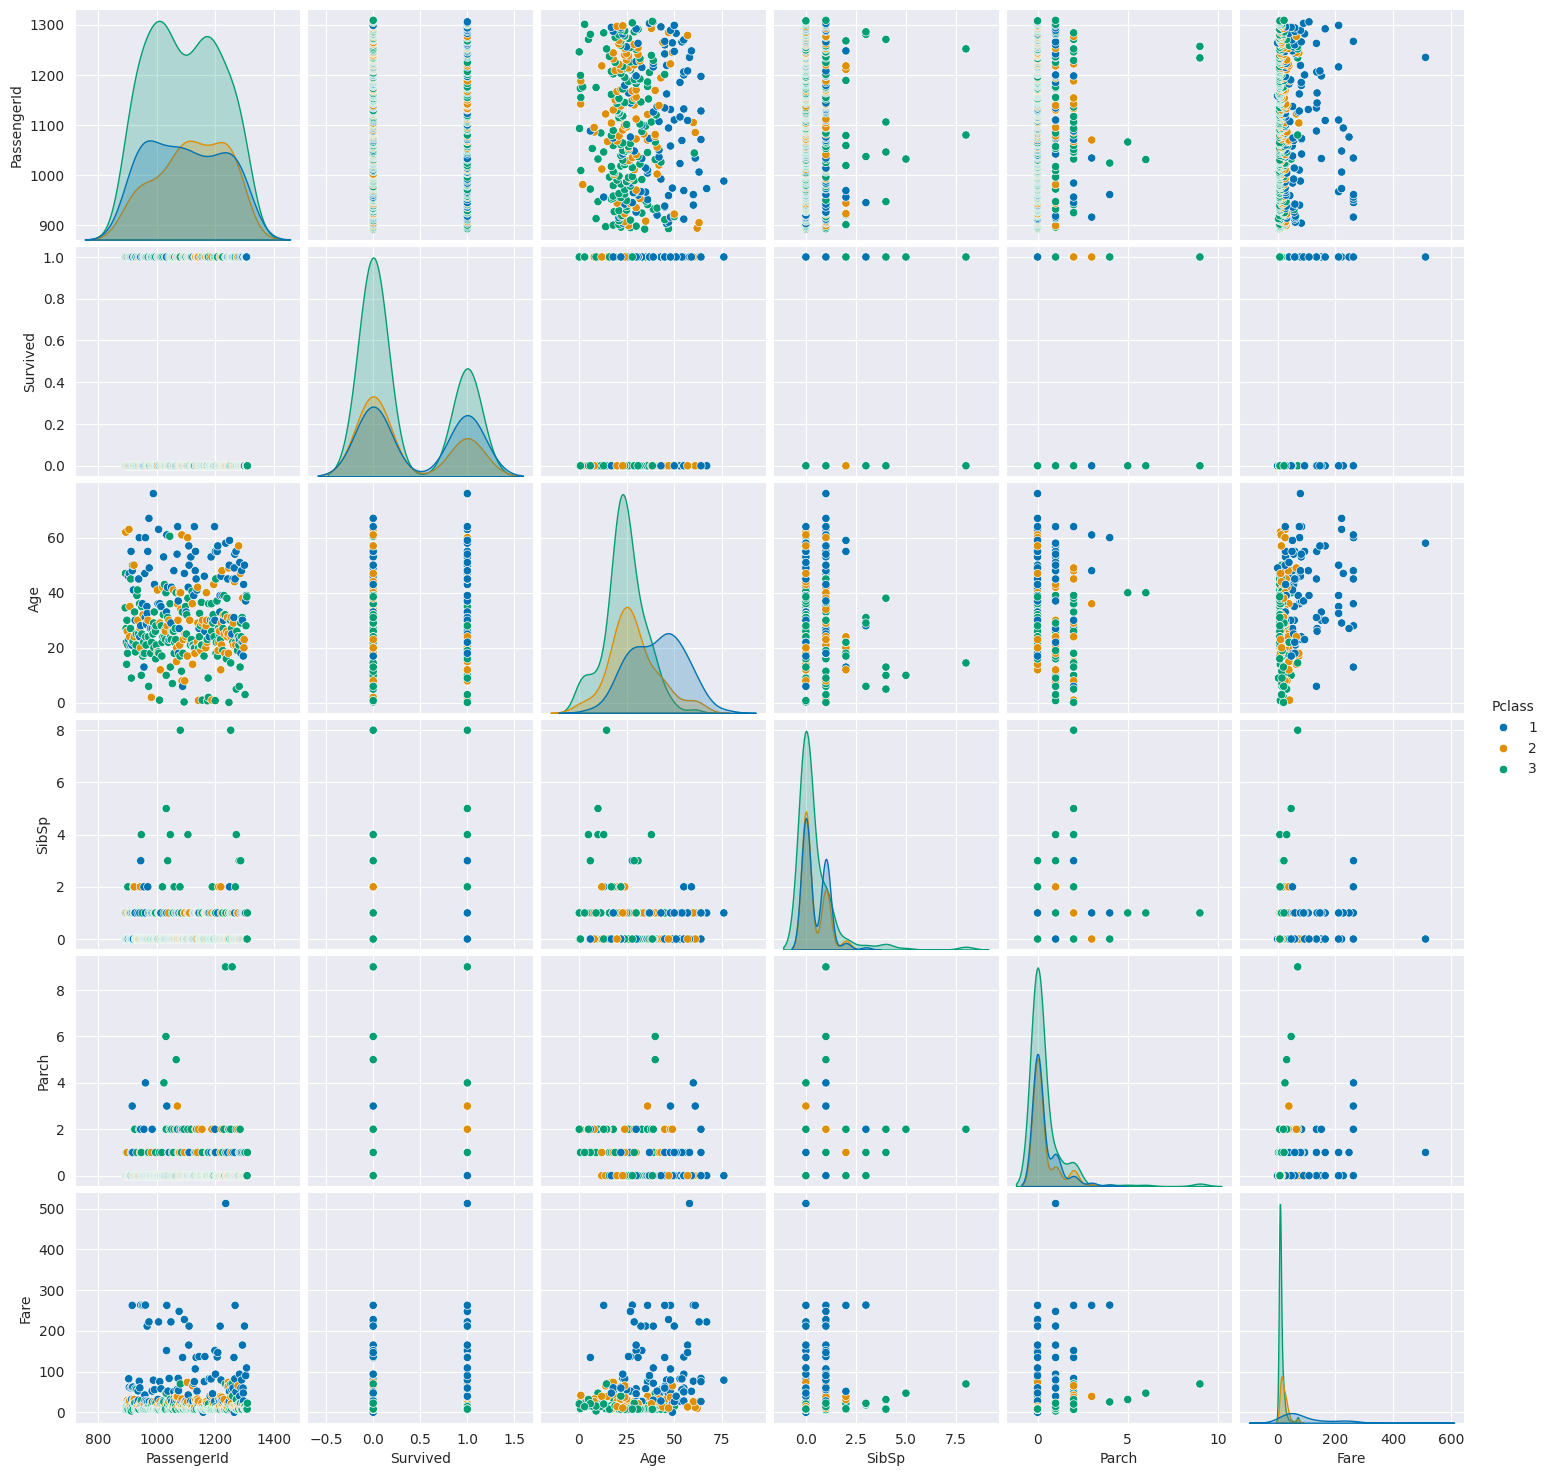

In [ ]:
sns.pairplot(df,hue='Pclass',palette='colorblind')

In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

<Axes: >

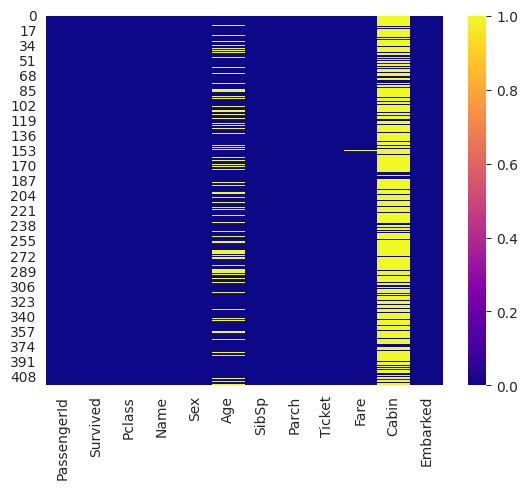

In [ ]:
sns.heatmap(df.isnull(),cmap='plasma',cbar=True)

In [ ]:
df.drop(columns=['Cabin'],axis=1,inplace=True)

<ipython-input-25-c5985a766f24>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Pclass',y='Age',data=df,palette='winter')


<Axes: xlabel='Pclass', ylabel='Age'>

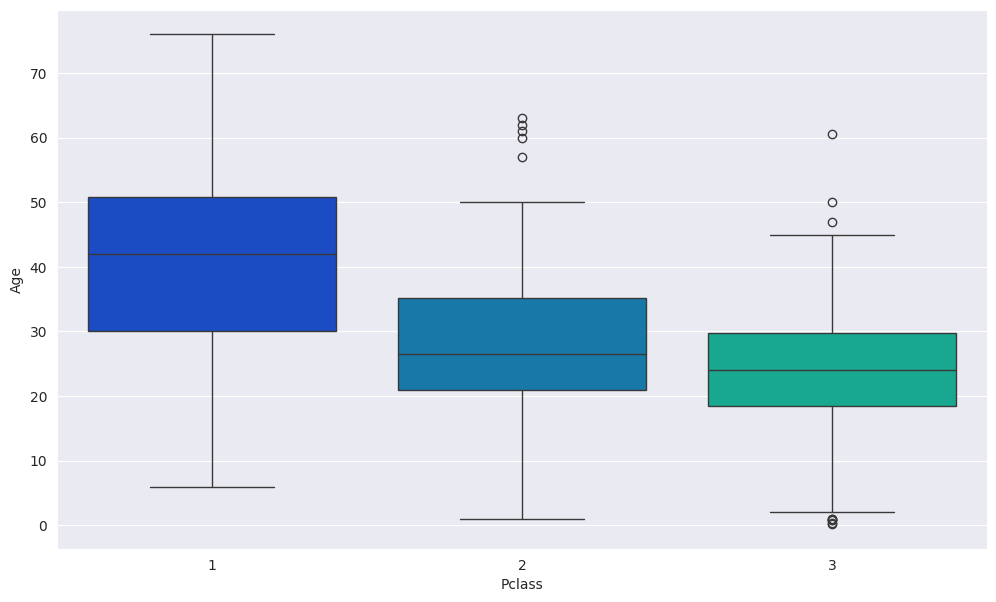

In [ ]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=df,palette='winter')

In [ ]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]

    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

###

df['Age'] = df[['Age','Pclass']].apply(impute_age,axis=1)
df['Fare'] = df['Fare'].fillna(df['Fare'].mean())
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

<Axes: >

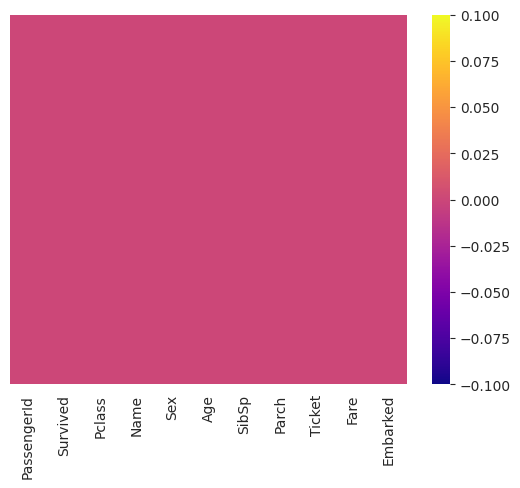

In [ ]:
sns.heatmap(df.isnull(),yticklabels=False,cmap='plasma')

In [ ]:
df.drop(columns=['PassengerId','Name','Ticket'],axis=1,inplace=True)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,34.5,0,0,7.8292,Q
1,1,3,female,47.0,1,0,7.0000,S
2,0,2,male,62.0,0,0,9.6875,Q
3,0,3,male,27.0,0,0,8.6625,S
4,1,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...,...
413,0,3,male,24.0,0,0,8.0500,S
414,1,1,female,39.0,0,0,108.9000,C
415,0,3,male,38.5,0,0,7.2500,S
416,0,3,male,24.0,0,0,8.0500,S


In [ ]:
df_new = pd.get_dummies(df, columns=['Sex', 'Embarked'])
df_new['Sex_female'] = df_new['Sex_female'].astype(int)
df_new['Sex_male'] = df_new['Sex_male'].astype(int)
df_new['Embarked_C'] = df_new['Embarked_C'].astype(int)
df_new['Embarked_Q'] = df_new['Embarked_Q'].astype(int)
df_new['Embarked_S'] = df_new['Embarked_S'].astype(int)
df_new

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,34.5,0,0,7.8292,0,1,0,1,0
1,1,3,47.0,1,0,7.0000,1,0,0,0,1
2,0,2,62.0,0,0,9.6875,0,1,0,1,0
3,0,3,27.0,0,0,8.6625,0,1,0,0,1
4,1,3,22.0,1,1,12.2875,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
413,0,3,24.0,0,0,8.0500,0,1,0,0,1
414,1,1,39.0,0,0,108.9000,1,0,1,0,0
415,0,3,38.5,0,0,7.2500,0,1,0,0,1
416,0,3,24.0,0,0,8.0500,0,1,0,0,1


In [ ]:
df_new.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female',
       'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [ ]:
X = df_new[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female',
       'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S']]
y = df_new['Survived']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33)
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [ ]:
pred_knn = knn.predict(X_test)
print("Accuracy of Titanic Dataset using Knn = ",accuracy_score(y_test,pred_knn))



Accuracy of Titanic Dataset using Knn =  0.6956521739130435


In [ ]:
print(classification_report(y_test,pred_knn))

              precision    recall  f1-score   support

           0       0.72      0.87      0.79        91
           1       0.59      0.36      0.45        47

    accuracy                           0.70       138
   macro avg       0.66      0.61      0.62       138
weighted avg       0.68      0.70      0.67       138



In [ ]:
print(confusion_matrix(y_test,pred_knn))

[[79 12]
 [30 17]]


In [ ]:
from sklearn.svm import SVC
svc = SVC(kernel='rbf')
svc.fit(X_train,y_train)

SVC()

In [ ]:
pred_svc = svc.predict(X_test)
print("Accuracy of Titanic Dataset using SVC = ",accuracy_score(y_test,pred_svc))

Accuracy of Titanic Dataset using SVC =  0.6594202898550725


In [ ]:
print(classification_report(y_test,pred_svc))

              precision    recall  f1-score   support

           0       0.67      0.97      0.79        91
           1       0.50      0.06      0.11        47

    accuracy                           0.66       138
   macro avg       0.58      0.52      0.45       138
weighted avg       0.61      0.66      0.56       138



In [ ]:
print(confusion_matrix(y_test,pred_svc))

[[88  3]
 [44  3]]
